# Preparation

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

20


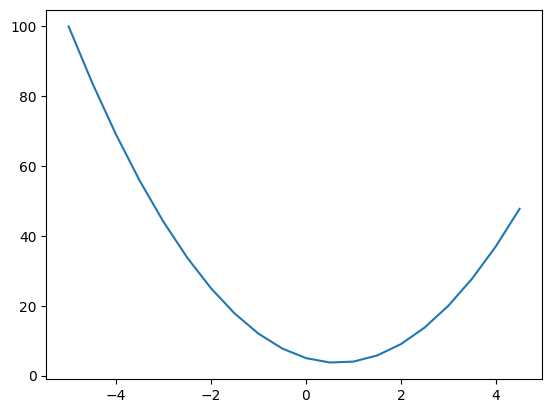

In [2]:
def f(x):
    return 3 * x**2 - 4 * x + 5


print(f(3))

xs = np.arange(-5.0, 5.0, 0.5)
plt.plot(xs, f(xs))
plt.show()

In [3]:
# df/dx = lim_h->0 (f(x+h) - f(x) / h)
h = 0.00001

a, b, c = 2.0, -3.0, 15.0
d1 = a * b + c
c += h
d2 = a * b + c
print(f"d1: {d1}")
print(f"d2: {d2}")
print(f"slope: {(d2-d1)/h}")

d1: 9.0
d2: 9.00001
slope: 0.9999999999621422


# Value Class

### Visualization

In [4]:
from graphviz import Digraph


def build_graph(root):
    nodes, edges = set(), set()

    def dfs(n):
        if n not in nodes:
            nodes.add(n)
            for child in n._prev:
                edges.add((child, n))
                dfs(child)

    dfs(root)
    return nodes, edges


def draw_dot(root):
    nodes, edges = build_graph(root)

    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})

    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape="record")
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(tail_name=uid + n._op, head_name=uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [2]:
from Values import Value

a = Value(3.0, label="a")
b = Value(2.0, label="b")
c = a * b
c.label = "c"

d = Value(1.0, label="d")
e = c + d
e.label = "e"
f = Value(-2.0, label="f")
L = e * f
L.label = "L"

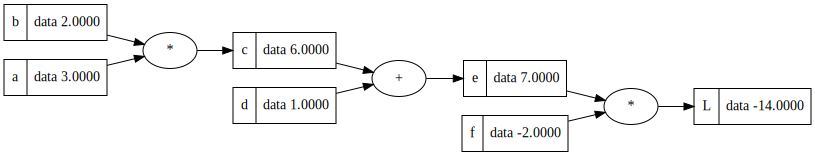

In [27]:
draw_dot(L)

### Back Propagation

In [6]:
# dL/dL = 1
L.grad = 1.0

# dL/de = f, dL/df = e
e.grad = f.data
f.grad = e.data

# dL/dc = (dL/de) * (de/dc)
c.grad = e.grad
d.grad = e.grad

# dL/da = (dL/dc) * (dc/da)
a.grad = c.grad * b.data
b.grad = c.grad * a.data

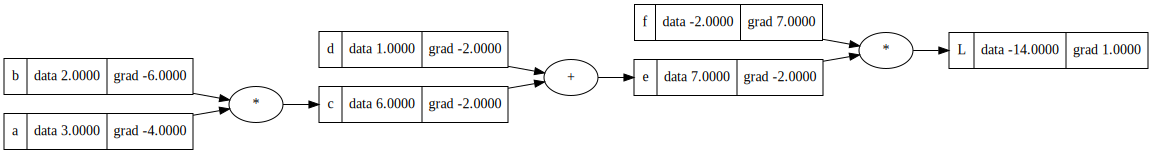

In [7]:
draw_dot(L)